In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_q1_house = pd.read_csv("final_q1_cleaned.csv")

In [57]:
df_q1_house.dtypes

Unnamed: 0                                int64
Candidate                                object
clean_name                               object
State                                    object
District                                 object
num_candidates_in_race                    int64
Office Type                              object
Race Type                                object
Primary Status                           object
Primary Runoff Status                    object
General Status                           object
Primary %                               float64
Endorsements                            float64
district_identifier                      object
district_lean                           float64
Cand_Office                              object
Cand_Party_Affiliation                   object
Cand_Incumbent_Challenger_Open_Seat      object
Total_Receipt                           float64
Total_Disbursement                      float64
Cash_On_Hand_COP                        

In the cell below, we see that there does appear to be a slight affect of receiving endorsements vs not receiving endorsements. We can tell this through the different shapes of the histogram. The blue histogram has a max towards the left of the graph while the red histogram has a maximum more centrally located on the graph, implying a difference in the distributions. Overall, this histogram proves tough to interpret as the orange histogram has less datapoints than the blue histogram. Nevertheless, it does warrant a further look into the question of whether or not having endorsements has a casual effect.

Text(0, 0.5, '# Representatives')

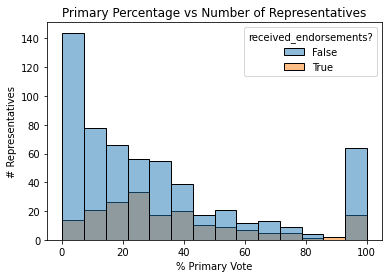

In [5]:
p = sns.histplot(data=df_q1_house, x="Primary %", hue="received_endorsements?")
p.set(title='Primary Percentage vs Number of Representatives')
p.set_xlabel("% Primary Vote")
p.set_ylabel("# Representatives")

The visualization below suggests that having endorsements gives an advantage in advancing past the primary stage of an election. As we can see, the columns of people advancing with endorsements has a similar height than those not advancing with endorsements, despite having considerably less people to draw from. We can also see that those that received no endorsements  have a  far more likely chance to lose rather than advance. This graph further motivates our question of whether or not endorsements matter.

Text(0, 0.5, '# Representatives')

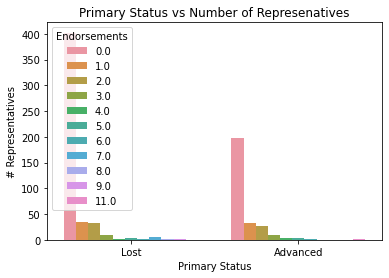

In [6]:
p = sns.countplot(x="Primary Status", hue="Endorsements", data = df_q1_house[df_q1_house['Primary Status'] != "On the Ballot"]);
p.set(title='Primary Status vs Number of Represenatives')
p.set_xlabel("Primary Status")
p.set_ylabel("# Representatives")

In [16]:
df_question_2 = pd.read_csv("q2dataset.csv") # 0 is dem, 1 is rep

In [18]:
df_question_2 = df_question_2[['Winner', 'cases', 'deaths', 'TotalPop','Hispanic', 'White', 'Black', 'Asian', 'Income', 
                               'IncomePerCap', 'Poverty', 'ChildPoverty',
                               'WorkAtHome', 'MeanCommute', 'Employed',
                               'PrivateWork', 'PublicWork', 'Unemployment', 
                               'Population Change %', "%Pop>25Bachelor's Degree", 'Population Density']]

In [26]:
df_question_2.dtypes

Winner                        int64
cases                       float64
deaths                      float64
TotalPop                    float64
Hispanic                    float64
White                       float64
Black                       float64
Asian                       float64
Income                      float64
IncomePerCap                float64
Poverty                     float64
ChildPoverty                float64
WorkAtHome                  float64
MeanCommute                 float64
Employed                    float64
PrivateWork                 float64
PublicWork                  float64
Unemployment                float64
Population Change %         float64
%Pop>25Bachelor's Degree    float64
Population Density          float64
dtype: object

The graph below, while simple, provides a critical piece of information in interpreting the remaining plots of the EDA. There will be far more counties that vote for republicans than democrats. This is the nature of how the parties market themselves to different voters. Democrats will far outperform republicans in major cities where there are more votes to earn, while republicans perform better in smaller counties where there are less votes to earn. Thankfully for republicans, there are more of these small counties. While this graph is simple, it reminds us of this important fact while we try to predict whether a county will vote red or blue.

<AxesSubplot:xlabel='party', ylabel='count'>

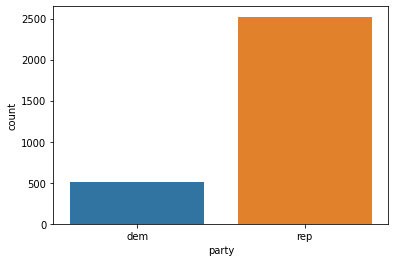

In [42]:
a = df_question_2.groupby("Winner").count().reset_index()[["Winner", "cases"]].replace({0:"dem", 1:"rep"}).rename(columns={"cases":"count", "Winner":"party"})
sns.barplot(data=a, x="party", y="count")

Below are select histograms that I made to visualize the rest of the features. The ones below are the ones that showed a difference between democrats (0) and republicans (1). If the distrubutions of both histograms vary, it will help us start to separate between republicans and democrats so that we can accurately predict who a county will vote for. These visualizations might point to the most predictive features too.

<AxesSubplot:xlabel="%Pop>25Bachelor's Degree", ylabel='Count'>

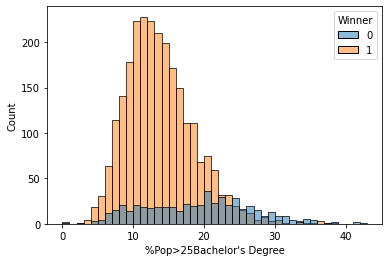

In [28]:
sns.histplot(data = df_question_2, x= "%Pop>25Bachelor's Degree", hue="Winner" )

<AxesSubplot:xlabel='Income', ylabel='Count'>

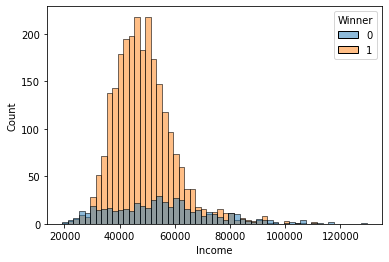

In [43]:
sns.histplot(data = df_question_2, x= "Income", hue="Winner" )

<AxesSubplot:xlabel='White', ylabel='Count'>

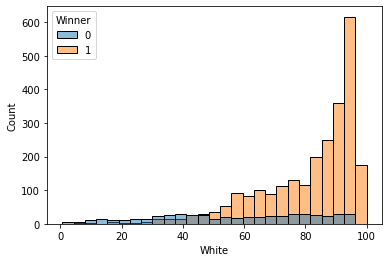

In [46]:
sns.histplot(data = df_question_2, x= "White", hue="Winner" )

<AxesSubplot:xlabel='ChildPoverty', ylabel='Count'>

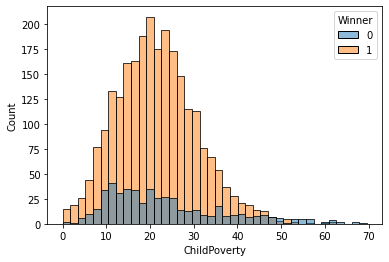

In [47]:
sns.histplot(data = df_question_2, x= "ChildPoverty", hue="Winner" )

<AxesSubplot:xlabel='TotalPop', ylabel='Count'>

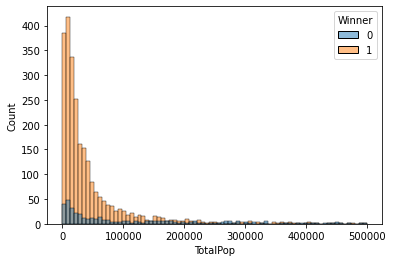

In [51]:
sns.histplot(data = df_question_2[df_question_2["TotalPop"] < 500000], x= "TotalPop", hue="Winner" )

<AxesSubplot:xlabel='WorkAtHome', ylabel='Count'>

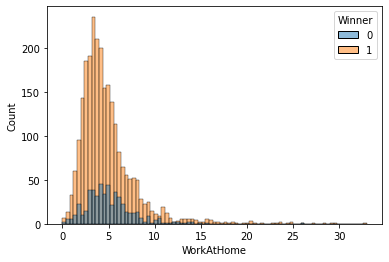

In [52]:
sns.histplot(data = df_question_2, x= "WorkAtHome", hue="Winner" )

<AxesSubplot:xlabel='Population Change %', ylabel='Count'>

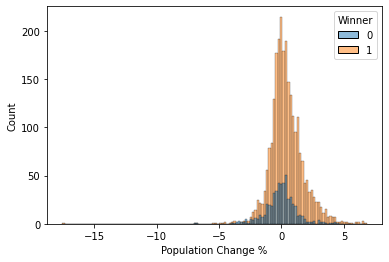

In [54]:
sns.histplot(data = df_question_2, x= "Population Change %", hue="Winner" )

<AxesSubplot:xlabel='Unemployment', ylabel='Count'>

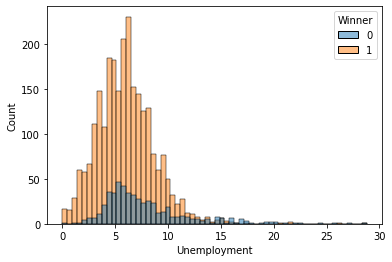

In [55]:
sns.histplot(data = df_question_2, x= "Unemployment", hue="Winner" )